In [1]:
import numpy as np
import pandas as pd

In [5]:
#import data
df = pd.read_csv("uber.csv")

In [7]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [16]:
df.drop(columns='Unnamed: 0', inplace=True)

In [17]:
df = df.dropna()

In [19]:
# df.drop(columns=['key','pickup_datetime'],inplace=True)

In [20]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


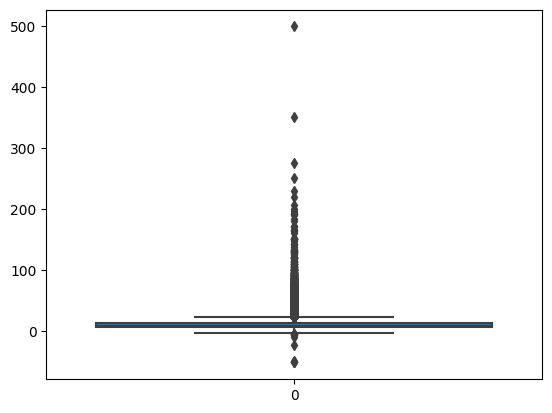

In [21]:
import seaborn as sns
bp = sns.boxplot(df['fare_amount'])

In [22]:
df.drop_duplicates(inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [23]:
Q1 = np.percentile(df['fare_amount'],25,interpolation='midpoint')
Q3 = np.percentile(df['fare_amount'],75,interpolation='midpoint')
print(Q1,Q3)

6.0 12.5


C:\Users\Nishigandha\AppData\Local\Temp\ipykernel_10092\3424771463.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['fare_amount'],25,interpolation='midpoint')
C:\Users\Nishigandha\AppData\Local\Temp\ipykernel_10092\3424771463.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['fare_amount'],75,interpolation='midpoint')


In [24]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

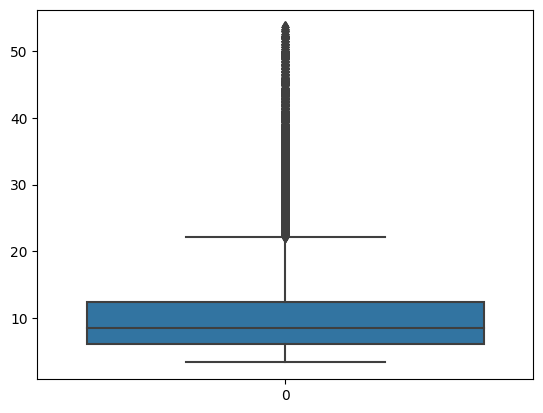

In [25]:
bp = sns.boxplot(df['fare_amount'])

In [27]:
df.drop(df[df['fare_amount'].values>=12.5].index,inplace=True)

C:\Users\Nishigandha\AppData\Local\Temp\ipykernel_10092\800556773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['fare_amount'].values>=12.5].index,inplace=True)


<Axes: >

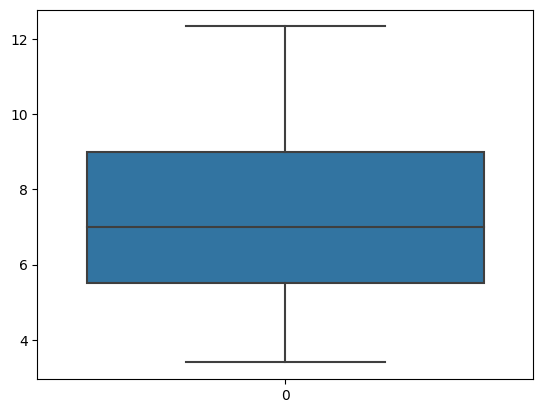

In [28]:
sns.boxplot(df['fare_amount'])

In [29]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [31]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
y_pred_linear=linear_reg_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression Model:
Linear Regression RMSE: 2.27
Linear Regression R-squared (R2): -0.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nRandom Forest Regression Model:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")